In [2]:
import pandas as pd
import glob

def global_min_max_scaling(df, a=0, b=10000):
    global_min = df.min().min()  # Minimum value across the entire dataframe
    global_max = df.max().max()  # Maximum value across the entire dataframe
    
    if global_min == global_max:  # Check if all values are the same
        print(f"The entire dataset has constant values: {global_min}. No scaling applied.")
        return df
    
    # Apply global Min-Max scaling
    df = a + (df - global_min) * (b - a) / (global_max - global_min)
    print(f"Scaled data from {global_min}-{global_max} to {df.min().min()}-{df.max().max()}")
    return df

# Loop through all files starting with "Scan" and ending with ".csv"
for file_path in glob.glob("Scan*.csv"):
    print(f"Processing file: {file_path}")
    # Load CSV file without headers
    df = pd.read_csv(file_path, header=None)
    
    # Apply global Min-Max scaling
    scaled_df = global_min_max_scaling(df)
    
    # Save the scaled data to a new CSV file without headers
    new_file_name = file_path.replace("Scan", "Scaled")
    scaled_df.to_csv(new_file_name, index=False, header=False)
    print(f"Saved scaled data to: {new_file_name}")

Processing file: Scan 142 Strd ROI BrownM.csv
Scaled data from 526-13968 to 0.0-10000.0
Saved scaled data to: Scaled 142 Strd ROI BrownM.csv
Processing file: Scan 183 Strd ROI BrownM.csv
Scaled data from 430-15167 to 0.0-10000.0
Saved scaled data to: Scaled 183 Strd ROI BrownM.csv


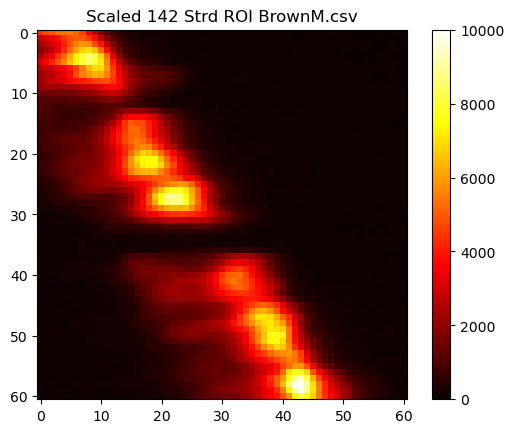

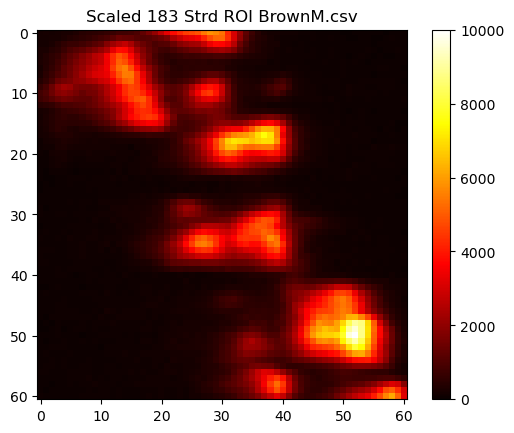

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

file_list = glob.glob('Scaled*.csv')

for file_name in file_list:
    matrix = np.genfromtxt(file_name, delimiter=',')

    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(file_name)
    plt.show()

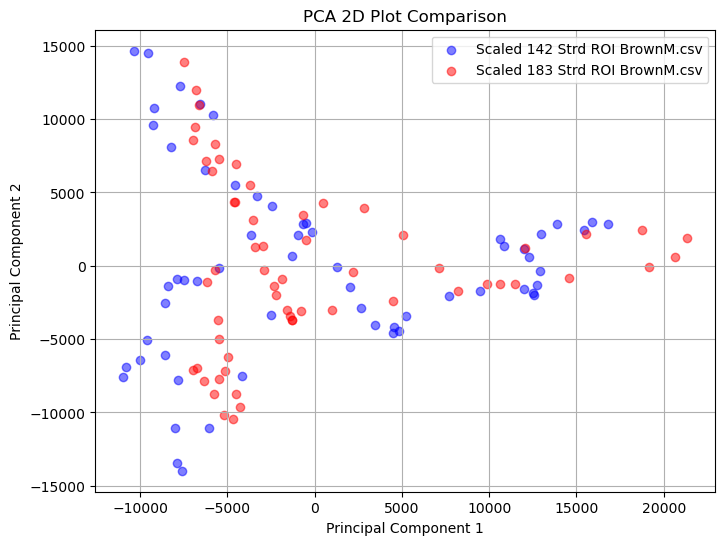

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Specify the file names you want to compare
file1 = 'Scaled 142 Strd ROI BrownM.csv'
file2 = 'Scaled 183 Strd ROI BrownM.csv'

# Load the 3D data from the first .csv file into a pandas DataFrame
data_1 = pd.read_csv(file1)

# Load the 3D data from the second .csv file into a pandas DataFrame
data_2 = pd.read_csv(file2)

# Perform PCA on the first 3D data
pca_1 = PCA(n_components=2)
data_pca_1 = pca_1.fit_transform(data_1)

# Perform PCA on the second 3D data
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_2)

# Create a scatter plot overlaying the two PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_1[:, 0], data_pca_1[:, 1], c='b', label=f'{file1}', alpha=0.5)
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c='r', label=f'{file2}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Plot Comparison')
plt.legend()
plt.grid(True)
plt.show()

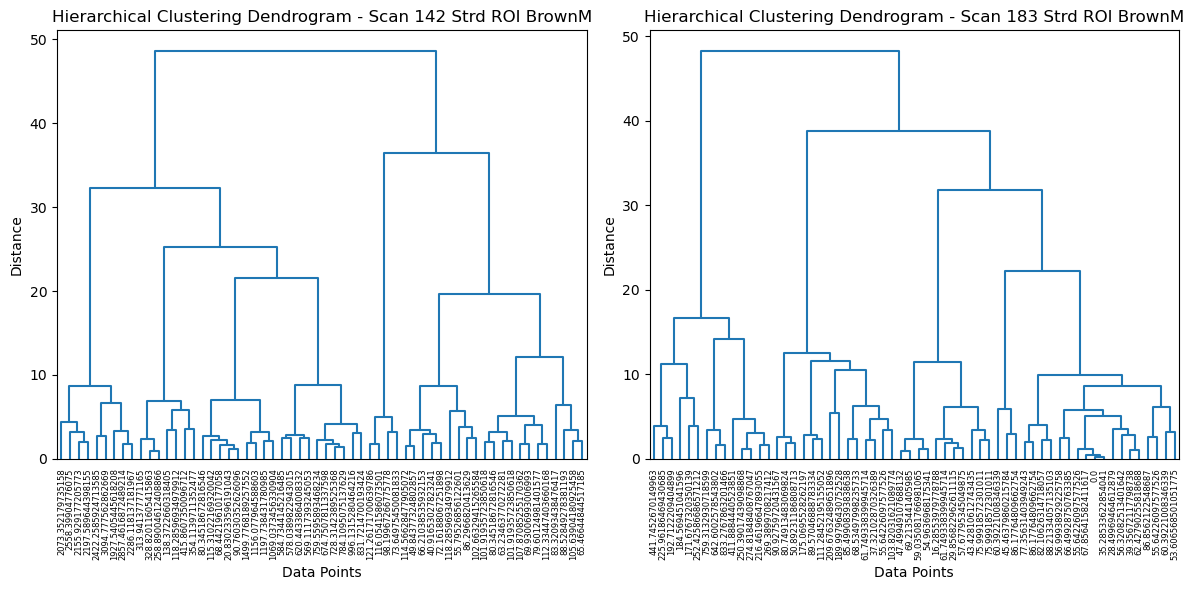

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Load the data from the first CSV file into a pandas DataFrame
data_1 = pd.read_csv('Scaled 142 Strd ROI BrownM.csv', index_col=0)

# Load the data from the second CSV file into a pandas DataFrame
data_2 = pd.read_csv('Scaled 183 Strd ROI BrownM.csv', index_col=0)

# Standardize the data for both files
scaler = StandardScaler()
data_standardized_1 = scaler.fit_transform(data_1)
data_standardized_2 = scaler.fit_transform(data_2)

# Perform hierarchical clustering for both files
linkage_matrix_1 = hierarchy.linkage(data_standardized_1, method='ward')
linkage_matrix_2 = hierarchy.linkage(data_standardized_2, method='ward')

# Create side-by-side dendrogram plots for comparison
plt.figure(figsize=(12, 6))

# Subplot 1: Dendrogram for the first file
plt.subplot(1, 2, 1)
dendrogram_1 = hierarchy.dendrogram(linkage_matrix_1, labels=data_1.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 142 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

# Subplot 2: Dendrogram for the second file
plt.subplot(1, 2, 2)
dendrogram_2 = hierarchy.dendrogram(linkage_matrix_2, labels=data_2.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 183 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scaled 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Strd ROI BrownM.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'red', -1: 'blue'}

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    colors = [color_map[label] for label in labels]

    # Using plotly for interactive plotting
    fig = go.Figure(data=[go.Scatter3d(x=X_flat, y=Y_flat, z=Z_flat, mode='markers', marker=dict(size=3, color=colors))])
    
    fig.update_layout(title=f'SVM Clustering - {file_name}', margin=dict(l=0, r=0, b=0, t=40))
    fig.show()

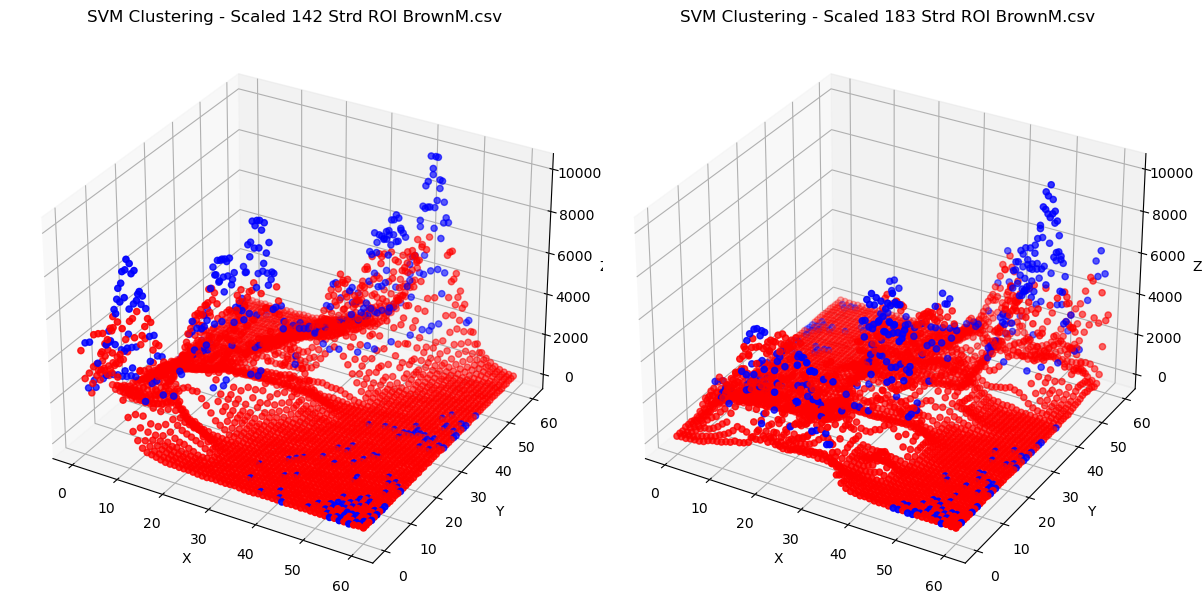

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scaled 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Strd ROI BrownM.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'r', -1: 'b'}

fig = plt.figure(figsize=(12, 6))  # Adjust figure size as per your requirements

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    ax = fig.add_subplot(1, 2, index + 1, projection='3d')  # This will create two side-by-side 3D plots
    ax.scatter(X_flat, Y_flat, Z_flat, c=[color_map[label] for label in labels])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'SVM Clustering - {file_name}')

plt.tight_layout()
plt.show()

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.



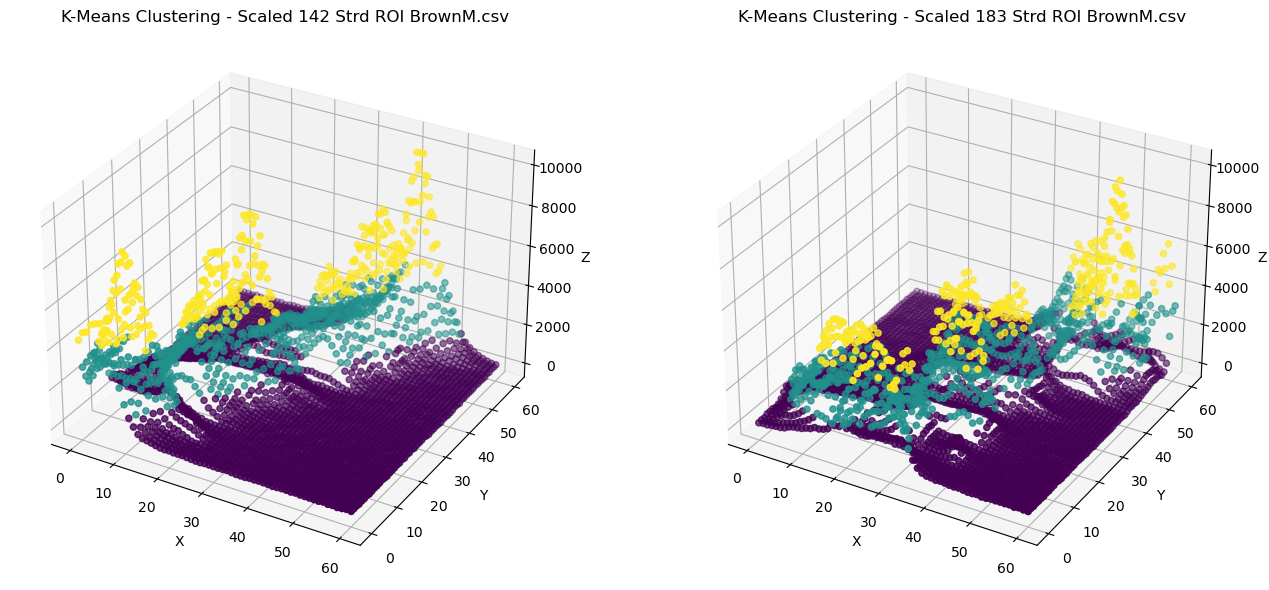

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file1_name = 'Scaled 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scaled 183 Strd ROI BrownM.csv'  # Replace with your specific file name

file_list = [file1_name, file2_name]

# Create a single figure and specify its size
fig = plt.figure(figsize=(14, 6))

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')
    X = matrix.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    # Adjust the position of the subplot for each file
    ax = fig.add_subplot(1, 2, index+1, projection='3d')
    ax.scatter(X_flat, Y_flat, Z_flat, c=labels, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'K-Means Clustering - {file_name}')

plt.tight_layout()
plt.show()

In [4]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import plotly.figure_factory as ff

# Sample data loading and processing
data_1 = pd.read_csv('Scaled 142 Strd ROI BrownM.csv', index_col=0)
data_2 = pd.read_csv('Scaled 183 Strd ROI BrownM.csv', index_col=0)

scaler = StandardScaler()
data_standardized_1 = scaler.fit_transform(data_1)
data_standardized_2 = scaler.fit_transform(data_2)

linkage_matrix_1 = hierarchy.linkage(data_standardized_1, method='ward')
linkage_matrix_2 = hierarchy.linkage(data_standardized_2, method='ward')

# Create dendrogram figures
fig_dendro_1 = ff.create_dendrogram(data_standardized_1, labels=data_1.index.tolist())
fig_dendro_2 = ff.create_dendrogram(data_standardized_2, labels=data_2.index.tolist())

# Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='dendro-1', figure=fig_dendro_1),
    dcc.Graph(id='heatmap-1', figure=go.Figure(data=[go.Heatmap(z=data_1, colorscale='hot')])),
    dcc.Graph(id='dendro-2', figure=fig_dendro_2),
    dcc.Graph(id='heatmap-2', figure=go.Figure(data=[go.Heatmap(z=data_2, colorscale='hot')]))
])

@app.callback(
    [Output('heatmap-1', 'figure'),
     Output('heatmap-2', 'figure')],
    [Input('dendro-1', 'selectedData'),
     Input('dendro-2', 'selectedData')]
)
def update_heatmaps(selectedData1, selectedData2):
    # Extract selected indices from dendrogram
    if selectedData1:
        selected_indices = [point['label'] for point in selectedData1['points']]
        # Use the indices to highlight or zoom into the correlated area on heatmap-1
        # Modify fig1 accordingly
        fig1 = go.Figure(data=[go.Heatmap(z=data_1.loc[selected_indices], colorscale='hot')])
    else:
        fig1 = go.Figure(data=[go.Heatmap(z=data_1, colorscale='hot')])

    if selectedData2:
        selected_indices = [point['label'] for point in selectedData2['points']]
        fig2 = go.Figure(data=[go.Heatmap(z=data_2.loc[selected_indices], colorscale='hot')])
    else:
        fig2 = go.Figure(data=[go.Heatmap(z=data_2, colorscale='hot')])

    return fig1, fig2

if __name__ == '__main__':
    app.run_server(debug=True)

